## Task:

1. Accept a user's name, age, and a list of their skills.
2. Pass the state through **three nodes** that:
    - **First Node**: Personalizes the name field with a greeting
    - **Second Node**: Describe the user's age
    - **Third Node**: List the user's skills in a formatted string
3. The final output in a result should be a **combined message** in the below format:

**Output**: Linda, welcome to the system! You are 31 years old! You have skills in: Python, Machine Learning and Langgraph!

***Hint*** : You will need to use the add_edge method twice 😉 

In [1]:
from typing import List, TypedDict
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    """State of the agent."""
    name: str
    age: str
    skils: List[str]
    result: str

In [3]:
def first_node(state: AgentState) -> AgentState:
    """Personlizes the greeting with the name"""

    state['result'] = f"Hello {state['name']}!"
    return state

def second_node(state: AgentState) -> AgentState:
    """Adds the age to the greeting"""
    
    state['result'] = f"{state['result']} You are {int(state['age'])} years old."
    return state

def third_node(state: AgentState) -> AgentState:
    """Adds the skills to the greeting"""
    
    state['result'] = f"{state['result']} Your skills are: {', '.join(state['skils'])}."
    return state

In [4]:
graph = StateGraph(AgentState)
graph.add_node("personalize_name", first_node)
graph.add_node("age_description", second_node)   # graph.add_node("age", second_node) - Will throw an error. ValueError: 'age' is already being used as a state key
graph.add_node("skillset", third_node)

graph.add_edge("personalize_name", "age_description")
graph.add_edge("age_description", "skillset")

graph.set_entry_point("personalize_name")
graph.set_finish_point("skillset")

app = graph.compile()

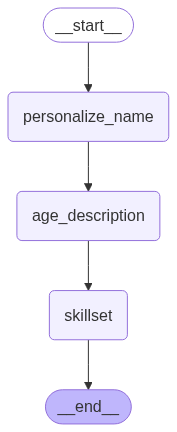

In [5]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result = app.invoke({
    "name": "Linda",
    "age": 30,
    "skils": ["Python", "Machine Learning", "Langgraph"]
})

In [7]:
result['result']

'Hello Linda! You are 30 years old. Your skills are: Python, Machine Learning, Langgraph.'